In [16]:
result_file = 'result.csv'
model = 'nyc-taxi-green-dec-2016_d10_l450_n899_20240921063302'

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
328,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,0,0.000000,nyc-taxi-green-dec-2016,1G,2,1.578290
329,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,1,0.420043,nyc-taxi-green-dec-2016,1G,2,1.435603
330,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,2,0.420043,nyc-taxi-green-dec-2016,1G,2,1.546989
331,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,1,0.830135,nyc-taxi-green-dec-2016,1G,2,1.506461
332,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,2,0.830135,nyc-taxi-green-dec-2016,1G,2,1.463405
333,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,1,1.240227,nyc-taxi-green-dec-2016,1G,2,1.375473
334,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,2,1.240227,nyc-taxi-green-dec-2016,1G,2,1.387061
335,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,1,1.650320,nyc-taxi-green-dec-2016,1G,2,1.318114
336,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,2,1.650320,nyc-taxi-green-dec-2016,1G,2,1.201472
337,nyc-taxi-green-dec-2016_d10_l450_n899_20240921...,1,2.060412,nyc-taxi-green-dec-2016,1G,2,1.212270


In [18]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 1.6148140274453908)

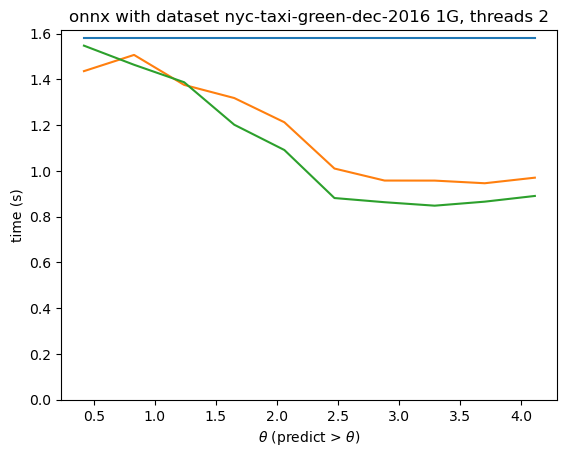

In [19]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))])
plt.plot(x, y1)
if len(y2) > 0:
    plt.plot(x, y2)
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.ylim(0)

(0.0, 1.9046957697793607)

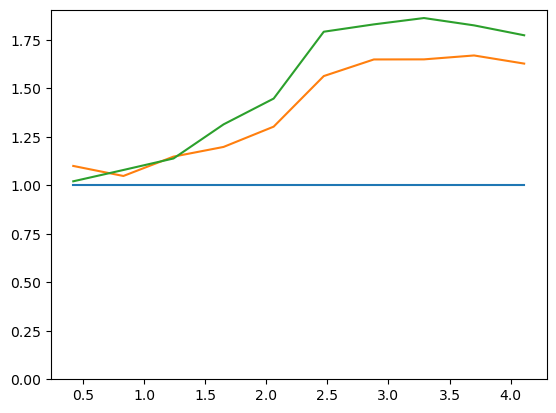

In [20]:
plt.plot(x, [1 for _ in range(len(x))])
plt.plot(x, base_line / y1)
if len(y2) > 0:
    plt.plot(x, base_line / y2)
plt.ylim(0)